In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('heyyy.xlsx')
df

,brand,model,year,status,fuel,gear,km,case_type,color,price
0,ford,ranger 2.2 TDCi XLT,2018,1,diesel,Automatic,0,pickup,smoked,859900
1,audi,q 7 3.0 TDI Quattro,2011,2,diesel,Automatic,259000,suv,black,810000
2,ford,ranger 2.2 TDCi XLT,2017,1,diesel,Automatic,0,pickup,blue,808000
3,ford,ranger 2.2 TDCi XLT,2017,1,diesel,Automatic,0,pickup,black,790000
4,volkswagen,cherokee 2.0 TD Limited,2016,1,diesel,Automatic,0,suv,white,789950
...,...,...,...,...,...,...,...,...,...,...
192,renault,fluence 1.5 dCi Business,2011,2,diesel,Manual,358000,sedan,gray,171000
193,renault,fluence 1.5 dCi Business,2010,2,diesel,Manual,360000,sedan,smoked,160000
194,renault,fluence 1.5 dCi Business,2012,2,diesel,Manual,342000,sedan,gray,156500
195,renault,fluence 1.5 dCi Business,2012,2,diesel,Manual,245000,sedan,gray,145000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   brand      197 non-null    object
 1   model      197 non-null    object
 2   year       197 non-null    int64 
 3   status     197 non-null    int64 
 4   fuel       197 non-null    object
 5   gear       197 non-null    object
 6   km         197 non-null    int64 
 7   case_type  197 non-null    object
 8   color      197 non-null    object
 9   price      197 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 15.5+ KB


# Data Visualization

<AxesSubplot:xlabel='brand', ylabel='count'>

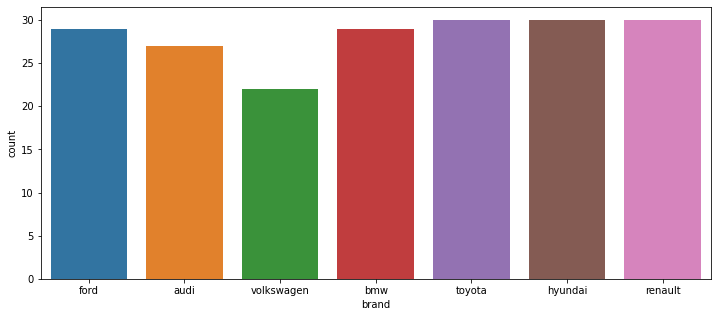

In [4]:
plt.figure(figsize=(12, 5))
sns.countplot(x ='brand', data=df)

<AxesSubplot:xlabel='brand', ylabel='price'>

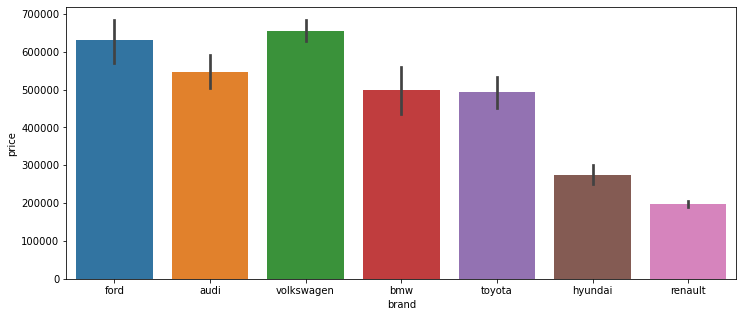

In [5]:
plt.figure(figsize=(12, 5))
sns.barplot(x ='brand', y = 'price', data=df)

<AxesSubplot:xlabel='price', ylabel='model'>

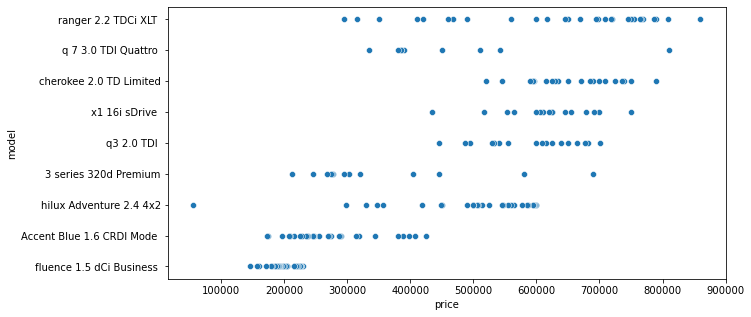

In [6]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='price',y='model',data=df)

it seems correlated with price!!
perfect

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


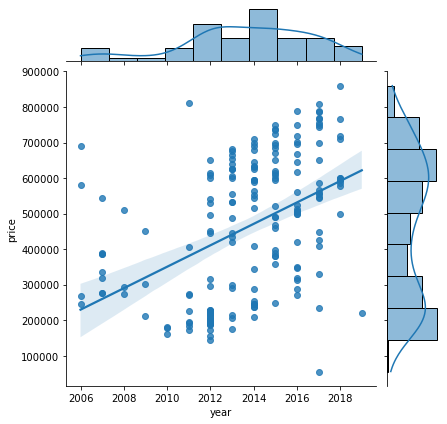

In [7]:
sns.jointplot(df['year'],df['price'],kind='reg') #skewness

<AxesSubplot:xlabel='km', ylabel='price'>

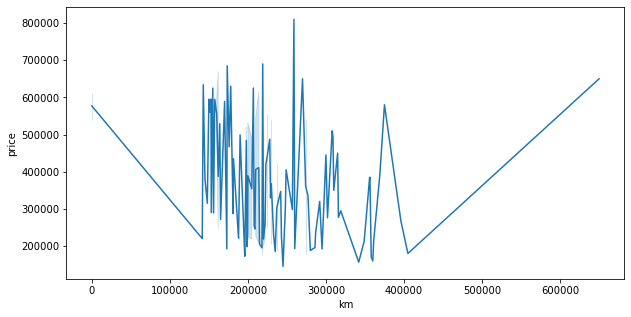

In [8]:
plt.figure(figsize = (10,5))
sns.lineplot(x = 'km', y = 'price',data = df)

it seems very bad correlation with price

<AxesSubplot:xlabel='fuel', ylabel='price'>

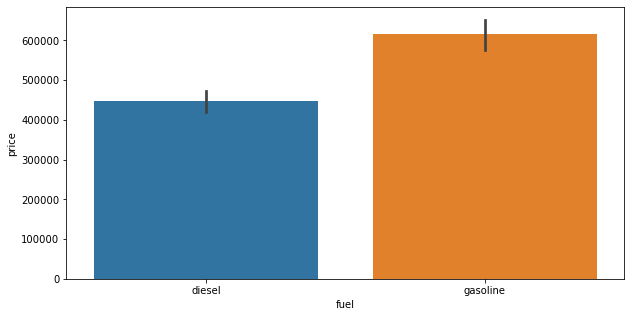

In [9]:
plt.figure(figsize=(10, 5))
sns.barplot(x ='fuel', y ='price', data=df)

<AxesSubplot:xlabel='status', ylabel='price'>

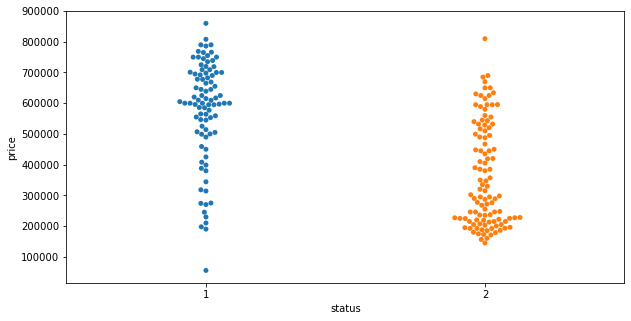

In [10]:
plt.subplots(figsize=(10,5))
sns.swarmplot(x = 'status', y ='price', data = df)

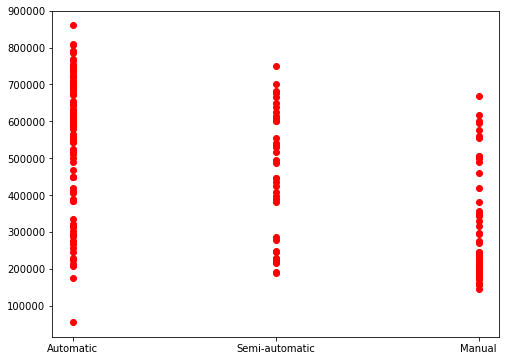

In [11]:
plt.figure(figsize=(8,6))
plt.plot(df.gear, df.price,'ro')

<AxesSubplot:xlabel='color', ylabel='price'>

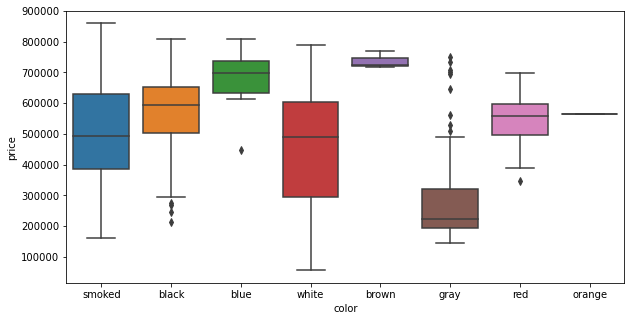

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(x ='color', y ='price', data=df)

(197, 10)

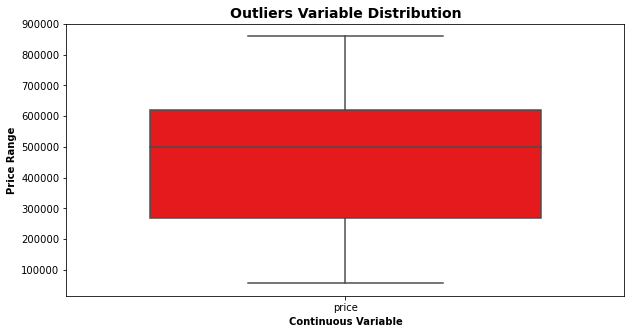

In [13]:
plt.figure(figsize = (10,5))
outliers = ['price']
sns.boxplot(data=df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df.shape 

# Data Preprocessing 

**Data cleaning**
* checking if there're missing values
* filling missing values if there are
* handling outliers
* removing irrelevant data

In [14]:
df.isnull().sum()

brand        0
model        0
year         0
status       0
fuel         0
gear         0
km           0
case_type    0
color        0
price        0
dtype: int64

now we check the features one by one and prepare them

In [15]:
df['brand'].value_counts()

toyota        30
hyundai       30
renault       30
ford          29
bmw           29
audi          27
volkswagen    22
Name: brand, dtype: int64

In [16]:
df['model'].value_counts()

hilux Adventure 2.4 4x2       30
Accent Blue 1.6 CRDI Mode     30
fluence 1.5 dCi Business      30
ranger 2.2 TDCi XLT           29
cherokee 2.0 TD Limited       22
q3 2.0 TDI                    18
x1 16i sDrive                 16
3 series 320d Premium         13
q 7 3.0 TDI Quattro            9
Name: model, dtype: int64

In [17]:
df['status'].value_counts()

2    107
1     90
Name: status, dtype: int64

In [18]:
df['fuel'].value_counts()

diesel      181
gasoline     16
Name: fuel, dtype: int64

In [19]:
df['gear'].value_counts()

Automatic         101
Manual             56
Semi-automatic     40
Name: gear, dtype: int64

In [20]:
df['case_type'].value_counts()

sedan     73
suv       66
pickup    58
Name: case_type, dtype: int64

In [21]:
df['year'].value_counts()

2012    36
2014    26
2015    25
2017    22
2016    22
2013    22
2018    13
2011     9
2007     8
2006     4
2008     3
2009     3
2010     3
2019     1
Name: year, dtype: int64

to reduce the features in years we could merge the years from 2010 and less in 2010 column

In [22]:
df['year'] = df['year'].replace([2009,2008,2007,2006],2010) 

In [23]:
#droping 2019
df = df[df.year != 2019]

In [24]:
df['year'].value_counts()

2012    36
2014    26
2015    25
2017    22
2016    22
2013    22
2010    21
2018    13
2011     9
Name: year, dtype: int64

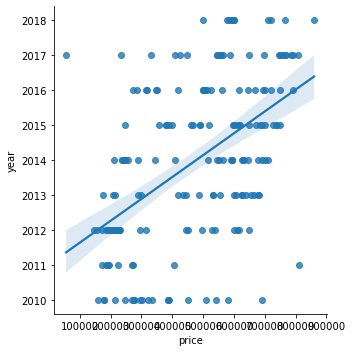

In [25]:
sns.lmplot(x='price',y='year',data=df)

In [26]:
df['color'].value_counts()

white     86
gray      44
black     34
red       12
smoked    10
blue       6
brown      3
orange     1
Name: color, dtype: int64

because smoked color is kind of gray we put them in the same feature under gray

In [27]:
df['color'] = df['color'].replace({'smoked':"gray"})

C:\Users\Dell\AppData\Local\Temp/ipykernel_14932/2354441156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = df['color'].replace({'smoked':"gray"})


droping orange and brown colors

In [28]:
#droping orange
df = df[df.color != 'orange']

In [29]:
#droping brown
df = df[df.color != 'brown']

In [30]:
df['color'].value_counts()

white    86
gray     54
black    34
red      12
blue      6
Name: color, dtype: int64

In [31]:
plt.figure(figsize=(8,6))


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [32]:
df['km'].value_counts()

0         86
162000     3
200000     3
230000     3
210000     3
          ..
181500     1
300000     1
315000     1
176000     1
245000     1
Name: km, Length: 85, dtype: int64

we notice that we have 86 new cars that haven't been used from the km = 0 and it may be not good for the data

In [33]:
df.corr()['price']

year      0.508365
status   -0.524267
km       -0.506802
price     1.000000
Name: price, dtype: float64

because the correlation is realy bad in status and km the best solution is to drop them

In [34]:
df = df.drop(['status'],axis=1)

In [35]:
df = df.drop(['km'],axis=1)

In [36]:
df.shape

(192, 8)

**Data Transformation**
* converting objects to integers

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
brand1 = LabelEncoder()
df['brand'] = brand1.fit_transform(df.brand)

In [39]:
fuel1 = LabelEncoder()
df['fuel'] = fuel1.fit_transform(df.fuel)

In [40]:
color1 = LabelEncoder()
df['color'] = color1.fit_transform(df.color)

In [41]:
gear1 = LabelEncoder()
df['gear'] = gear1.fit_transform(df.gear)

In [42]:
case_type1 = LabelEncoder()
df['case_type'] = case_type1.fit_transform(df.case_type)

In [43]:
model1 = LabelEncoder()
df['model'] = model1.fit_transform(df.model)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 196
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   brand      192 non-null    int32
 1   model      192 non-null    int32
 2   year       192 non-null    int64
 3   fuel       192 non-null    int32
 4   gear       192 non-null    int32
 5   case_type  192 non-null    int32
 6   color      192 non-null    int32
 7   price      192 non-null    int64
dtypes: int32(6), int64(2)
memory usage: 9.0 KB


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
brand,192.0,2.937500,1.940543,0.0,1.0,3.0,5.0,6.0
model,192.0,3.859375,2.455044,0.0,2.0,4.0,6.0,8.0
year,192.0,2013.864583,2.369615,2010.0,2012.0,2014.0,2016.0,2018.0
fuel,192.0,0.078125,0.269070,0.0,0.0,0.0,0.0,1.0
gear,192.0,0.697917,0.787597,0.0,0.0,0.0,1.0,2.0
case_type,192.0,1.041667,0.791535,0.0,0.0,1.0,2.0,2.0
color,192.0,2.572917,1.509098,0.0,2.0,3.0,4.0,4.0
price,192.0,457885.781250,195914.997009,55500.0,264675.0,492450.0,615500.0,859900.0


In [46]:
df.corr()

,brand,model,year,fuel,gear,case_type,color,price
brand,1.000000,-0.427154,0.372744,-0.291415,-0.252211,-0.274391,0.089168,-0.096741
model,-0.427154,1.000000,0.272101,0.492266,0.021239,-0.056242,-0.016295,0.535912
year,0.372744,0.272101,1.000000,0.008468,-0.209991,-0.477093,0.256065,0.508365
fuel,-0.291415,0.492266,0.008468,1.000000,-0.060992,0.353378,-0.110807,0.242460
gear,-0.252211,0.021239,-0.209991,-0.060992,1.000000,0.188262,0.181614,-0.280711
case_type,-0.274391,-0.056242,-0.477093,0.353378,0.188262,1.000000,-0.261158,0.109924
color,0.089168,-0.016295,0.256065,-0.110807,0.181614,-0.261158,1.000000,-0.099700
price,-0.096741,0.535912,0.508365,0.242460,-0.280711,0.109924,-0.099700,1.000000


<AxesSubplot:>

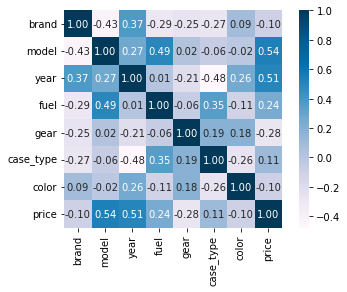

In [47]:
sns.heatmap(df.corr(), cmap="PuBu", square = True, annot=True, fmt='.2f')

In [48]:
df.corr()['price']

brand       -0.096741
model        0.535912
year         0.508365
fuel         0.242460
gear        -0.280711
case_type    0.109924
color       -0.099700
price        1.000000
Name: price, dtype: float64

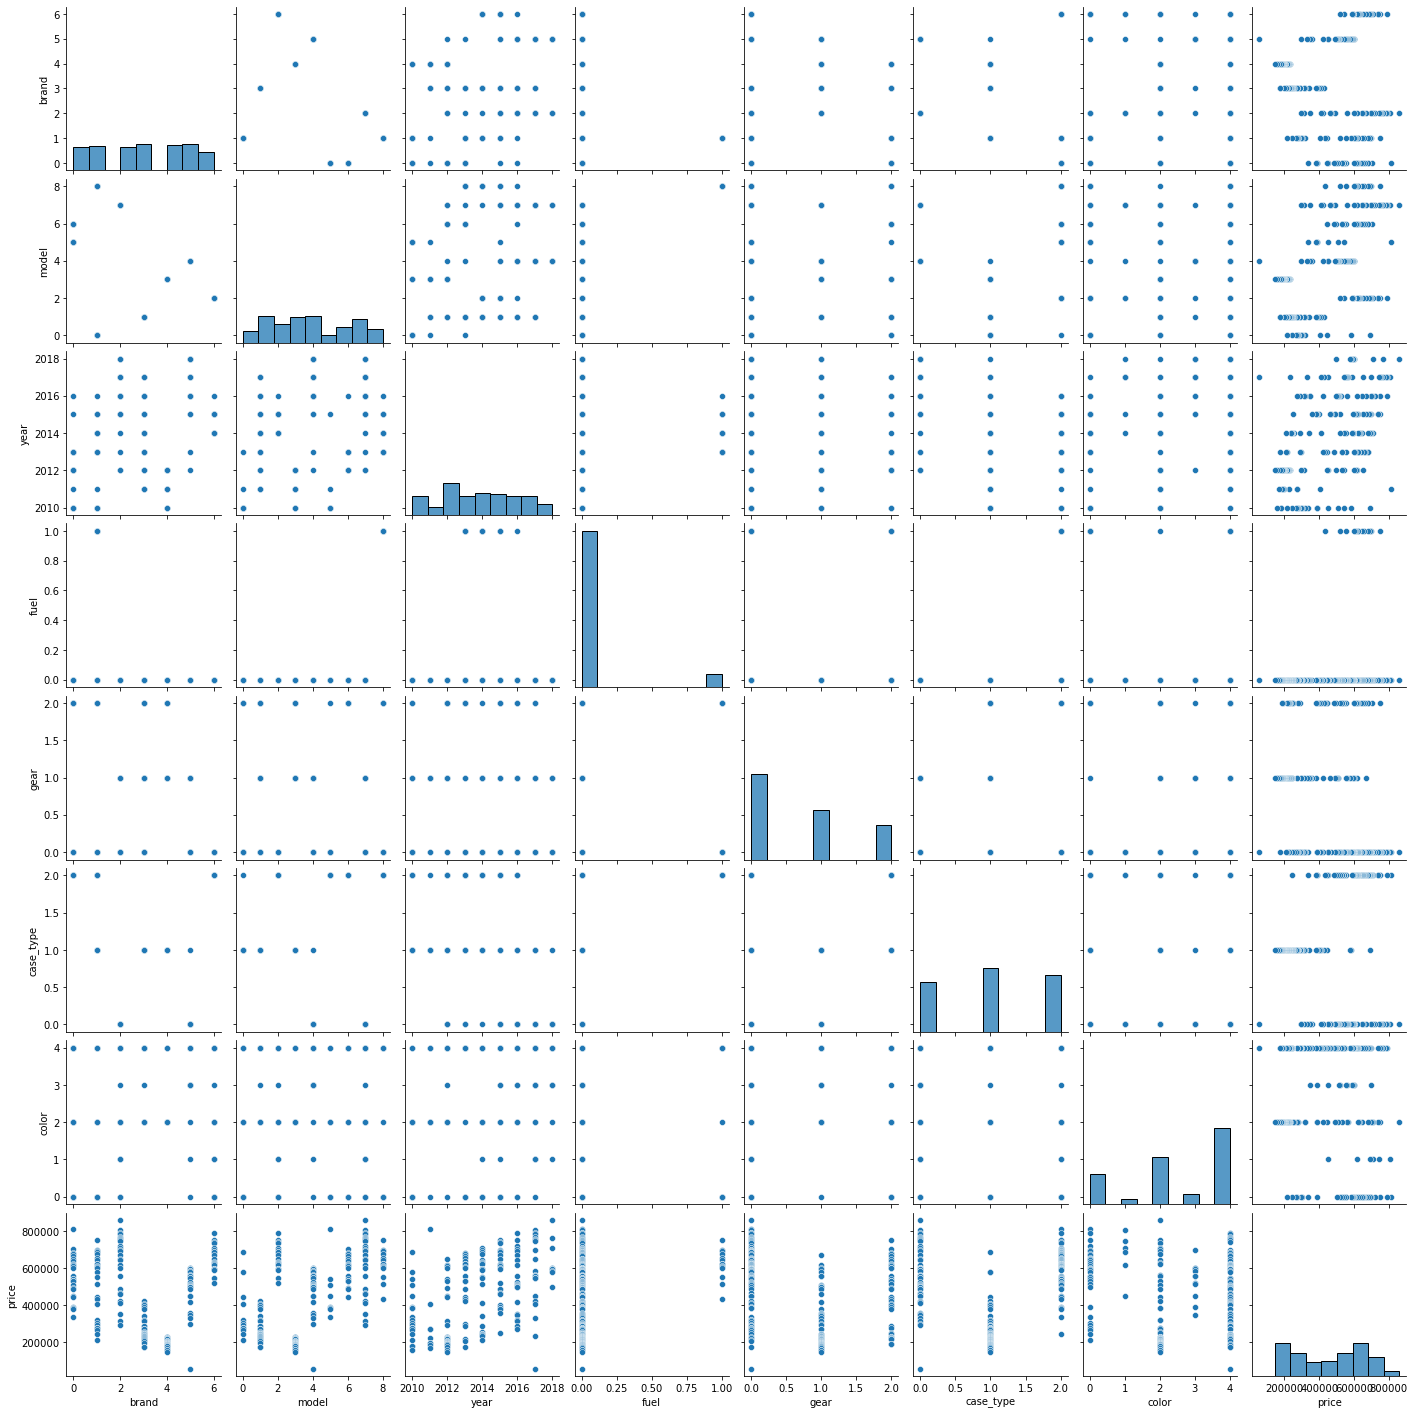

In [49]:
sns.pairplot(df)

we see that the data is pretty good and correlated with price so now we can train it

**Data Spliting**

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Normalizing**

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling and Evaluation

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

**Linear Regression**

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [58]:
print("Accuracy on Traing set: ",model.score(X_train,y_train))
print("Accuracy on Testing set: ",model.score(X_test,y_test))

Accuracy on Traing set:  0.6495209137040041
Accuracy on Testing set:  0.7079055685028162


In [59]:
print("Mean square error:",mean_squared_error(y_test,y_predict))
print("Root mean square error:",mean_squared_error(y_test,y_predict)**2)
print("Mean absolute error:",mean_absolute_error(y_test,y_predict))

Mean square error: 10752823097.341805
Root mean square error: 1.156232045627274e+20
Mean absolute error: 81371.70582354211


Text(0, 0.5, 'Predicted values')

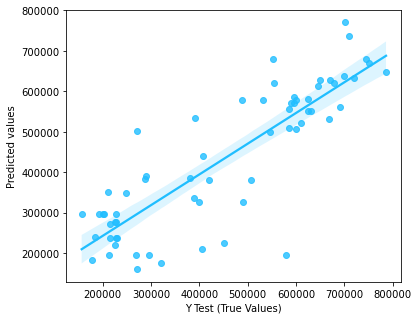

In [60]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(6,5))
sns.regplot(x = y_test,y = y_predict, color='#20BEFF')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')

**XGBoost**

In [61]:
import xgboost as xg 

In [62]:
model = xg.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [63]:
print("Traing set Score: ",model.score(X_train,y_train))
print("Testing set Score: ",model.score(X_test,y_test))

Traing set Score:  0.9442810145550018
Testing set Score:  0.7619078514381756


In [64]:
print("Mean square error:",mean_squared_error(y_test,y_predict))
print("Root mean square error:",mean_squared_error(y_test,y_predict)**2)
print("Mean absolute error:",mean_absolute_error(y_test,y_predict))

Mean square error: 8764846153.4468
Root mean square error: 7.682252809359118e+19
Mean absolute error: 68483.64208984375


Text(0, 0.5, 'Predicted values')

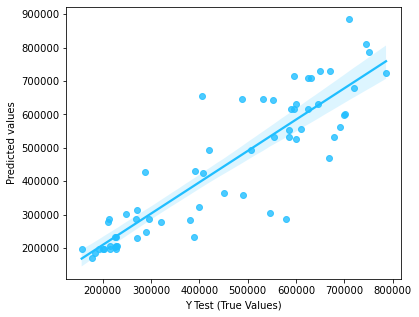

In [65]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(6,5))
sns.regplot(x = y_test,y = y_predict, color='#20BEFF')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')

**Random Forest**

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [68]:
print("Traing set Score: ",model.score(X_train,y_train))
print("Testing set Score: ",model.score(X_test,y_test))

Traing set Score:  0.9246577861668659
Testing set Score:  0.8266648647607949


In [69]:
print("Mean square error:",mean_squared_error(y_test,y_predict))
print("Root mean square error:",mean_squared_error(y_test,y_predict)**2)
print("Mean absolute error:",mean_absolute_error(y_test,y_predict))

Mean square error: 6380957131.662949
Root mean square error: 4.0716613916120244e+19
Mean absolute error: 59913.03761770434


Text(0, 0.5, 'Predicted values')

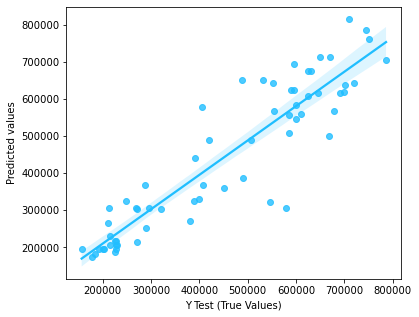

In [70]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(6,5))
sns.regplot(x = y_test,y = y_predict, color='#20BEFF')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')

**K-Nearest Neighbors**

In [71]:
from sklearn.neighbors import KNeighborsRegressor

In [72]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [73]:
print("Traing set Score: ",model.score(X_train,y_train))
print("Testing set Score: ",model.score(X_test,y_test))

Traing set Score:  0.8292306211920968
Testing set Score:  0.8052033456746748


In [74]:
print("Mean square error:",mean_squared_error(y_test,y_predict))
print("Root mean square error:",mean_squared_error(y_test,y_predict)**2)
print("Mean absolute error:",mean_absolute_error(y_test,y_predict))

Mean square error: 7171016418.142361
Root mean square error: 5.142347646926729e+19
Mean absolute error: 61056.645833333336


Text(0, 0.5, 'Predicted values')

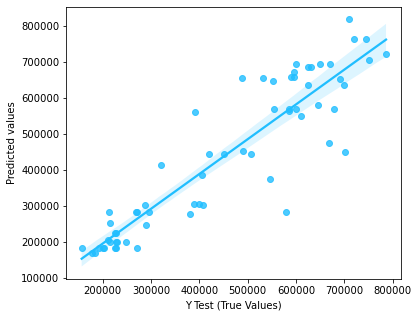

In [75]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(6,5))
sns.regplot(x = y_test,y = y_predict, color='#20BEFF')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')

In [76]:
from sklearn.tree import DecisionTreeRegressor  

In [77]:
model= DecisionTreeRegressor(random_state = 0) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [78]:
print("Traing set Score: ",model.score(X_train,y_train))
print("Testing set Score: ",model.score(X_test,y_test))

Traing set Score:  0.9449267276915857
Testing set Score:  0.7039412895885505


In [79]:
print("Mean square error:",mean_squared_error(y_test,y_predict))
print("Root mean square error:",mean_squared_error(y_test,y_predict)**2)
print("Mean absolute error:",mean_absolute_error(y_test,y_predict))

Mean square error: 10898759429.147678
Root mean square error: 1.1878295709443542e+20
Mean absolute error: 72586.17057291667


Text(0, 0.5, 'Predicted values')

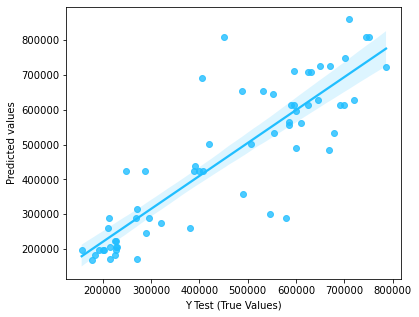

In [80]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.figure(figsize=(6,5))
sns.regplot(x = y_test,y = y_predict, color='#20BEFF')
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')

**Testing the last model**
* if you want to test another model run it then directly run the following code

In [81]:
new_car = df.drop('price',axis=1).iloc[0]
#selecting the first row of the data and try it on the model

In [82]:
new_car = scaler.transform(new_car.values.reshape(-1,7))

In [83]:
model.predict(new_car)

array([859900.])

In [84]:
df['price'][0]

859900